# Kernel Density Estimation

In [1]:
# import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Create a dataset

Here we sample data points from two normal distributions.

In [21]:
from typing import List
def datagen(N : int, # number of points to be sampled
            f : float = 0.3 , # fraction of points to be sampled from another normal distribution
            rseed : int = 1 ) -> List[float]:
    np.random.seed(rseed) # random seed for repeatability
    x = np.random.randn(N) # sample N points from a normal distribution
    x[int(f * N):] += 5 # add 5 to last N - int(f*N) points
    return x # return the generated number of points

x = datagen(1000)

## Histogram based density estimation

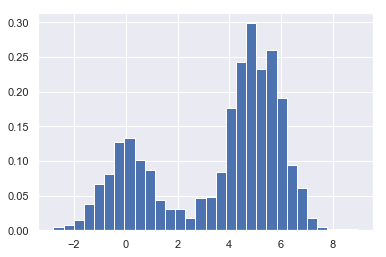

In [23]:
hist = plt.hist(x, bins=30, density=True)

You can clearly see two normal distributions in the above plot. 

### Advantages of histograms
- Useful in two dimensions and data could be discarded after histogram construction.
- Could be used when data arrives sequentially.

### Two major problems with histogram density estimation are as follows:
- If bin size is very small then the model is spiky, for large bin size the model is too smooth. Thus, the choice of bin size should be intermediate.
- It doesn't scale well with increasing data dimensions (curse of dimensionality). A D-dimensional dataset will have M^{D} discrete bins if each axis is encoded using M bins.

Let's look at an example of histograms with two bins sizes on the same data.

In [25]:
x = datagen(20) # generate a dataset of N points from two normal distributions
bins = np.linspace(-5, 10, 10) # create 10 evenly spaced numbers between -5 to 10

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

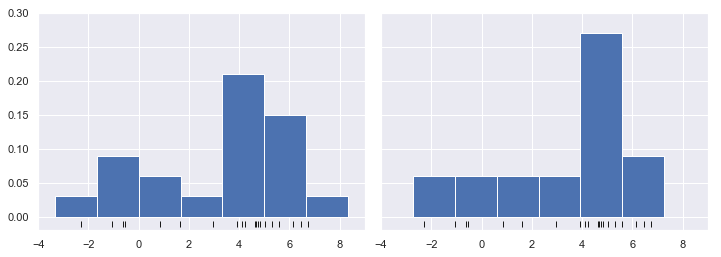

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

On the left, the histogram makes clear that this is a bimodal distribution. On the right, we see a unimodal distribution with a long tail. 

## Using a top-hat kernel for density estimation

In [57]:
x_d = np.linspace(-4, 8, 1000)
density = sum((abs(xi - x_d) < 0.5) for xi in x) # a data point x lies within a cube of height 1 centered at x_d

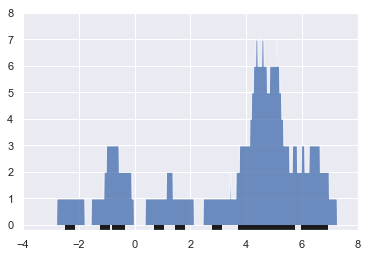

In [58]:
plt.fill_between(x_d, density, alpha=0.8)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=10)

plt.axis([-4, 8, -0.2, 8]);

## Using a Gaussian kernel for density estimation

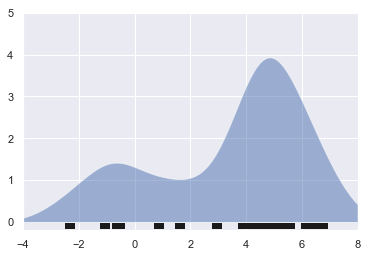

In [59]:
from scipy.stats import norm

x_d = np.linspace(-4, 8, 100)
density = sum(norm(xi).pdf(x_d) for xi in x) # instead of 1 or 0 we sum real numbers at all points on x-axis

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=10)

plt.axis([-4, 8, -0.2, 5]);